## Analisando o genoma da Covid-19 com o Biopython

Extraído de https://github.com/lanadominkovic/12-days-of-biopython

MN908947 - o genoma da covid-19 usado aqui foi sequenciado de uma amostra de fluido de lavagem broncoalveolar de um único paciente que era trabalhador do mercado e que foi internado no Hospital Central de Wuhan em 26 de dezembro de 2019

In [ ]:
# Instalando o Biopython
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.0 MB/s eta 0:00:00


In [ ]:
# Interface com o NCBI
from Bio import Entrez, SeqIO
Entrez.email = "cerri@icmc.usp.br"
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [ ]:
# Registro completo
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [ ]:
# Extrai a sequência
covid_dna = recs[0].seq
covid_dna
print(f'O genoma da Covid-19 consiste de {len(covid_dna)} nucleotídeos.')

O genoma da Covid-19 consiste de 29903 nucleotídeos.


In [ ]:
# Peso molecular - O peso molecular é medido em unidades de massa atômica
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214399999

In [ ]:
# Conteúdo GC - maior conteúdo GC implica em uma molécula mais estável devido a G e C formarem ligações triplas de hidrogênio
from Bio.SeqUtils import GC123
GC123(covid_dna)[0]

37.97277865097148

#### Distribuição de nucleotídeos no genoma da COVID-19

In [ ]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [ ]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Frequência de Nucleotídeos')

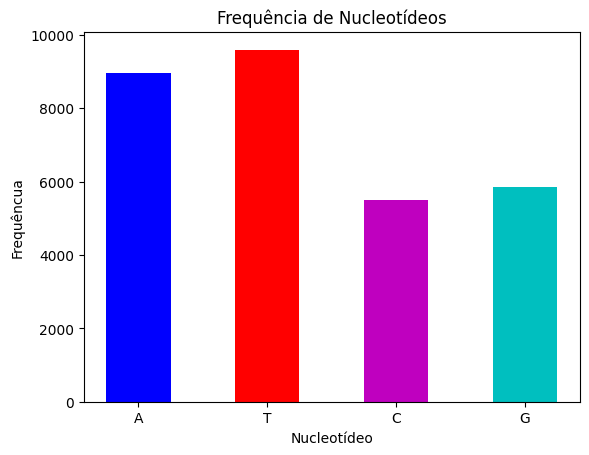

In [ ]:
# Coloca em um gráfico
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotídeo')
plt.ylabel('Frequêncua')
plt.title('Frequência de Nucleotídeos')

Primeira observação: A frequência dos nucleotídeos A e T é maior que a frequência de C e G.

Entender essa informação genética é a chave para encontrar curas e vacinas. Então, a questão aqui é: Como extraímos informações dessa longa sequência de letras?

Esse processo é chamado de expressão gênica: A expressão gênica é o processo pelo qual as informações de um gene são usadas na síntese de um produto gênico funcional. Esses produtos geralmente são proteínas.

#### Transcrição

Transcrição é o primeiro passo na expressão genética. Envolve copiar a sequência de DNA de um gene para fazer uma molécula de RNA.

In [ ]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

#### Tradução

Tradução é o processo que pega a informação transmitida do DNA como RNA mensageiro e a transforma em uma série de aminoácidos.

In [ ]:
covid_aa = covid_mrna.translate()
covid_aa

/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [ ]:
# Conta os aminoácidos
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Frequência na Sequência de Proteína')

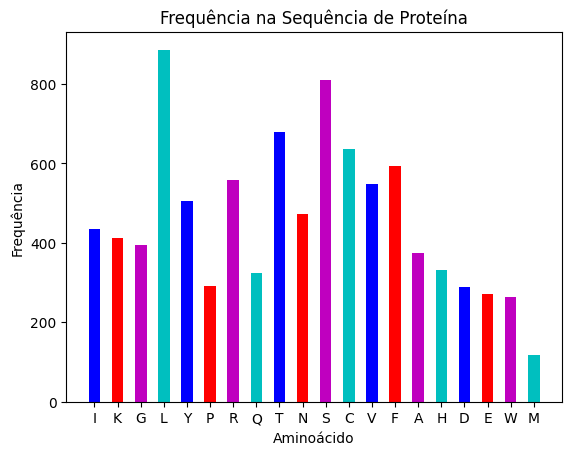

In [ ]:
# Deleta os * (stop codon)
# Plota os resultados
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Aminoácido')
plt.ylabel('Frequência')
plt.title('Frequência na Sequência de Proteína')

In [ ]:
print(f"O genoma da covid-19 tem {sum(common_amino.values())} aminoácidos")

O genoma da covid-19 tem 9193 aminoácidos


A função split() divide a sequência em qualquer stop códon e mantém as cadeias de aminoácidos separadas. Isso facilita a análise posterior.

In [ ]:
proteins = covid_aa.split('*')
proteins

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR'),
 Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('RWHLWLSRS'),
 Seq('KRRFAST'),
 Seq('TALCVHQTFGCSNCTSWSCYG'),
 Seq('AGSRTRRHSVRS'),
 Seq('W'),
 Seq('DTWCPCPSCGRNTSGLPQGSSS'),
 Seq('ER'),
 Seq(''),
 Seq('RSWWP'),
 Seq('LRRRSKVI'),
 Seq('LRRRAWH'),
 Seq('SL'),
 Seq('RFSRKLEH'),
 Seq('T'),
 Seq('QWCYP'),
 Seq('THA'),
 Seq('A'),
 Seq('RRGIHSLCR'),
 Seq('QLLWP'),
 Seq('WLPS'),
 Seq('VH'),
 Seq('RPSSTCW'),
 Seq('SFMHFVRTTGLY'),
 Seq('H'),
 Seq('EGCILLP'),
 Seq('T'),
 Seq('A'),
 Seq('NCLVHGTF'),
 Seq('KEL'),
 Seq('IADTF'),
 Seq('N'),
 Seq('IGKEI'),
 Seq('HLQWGMSKFCISLKFHNQDYSTKG'),
 Seq('KEKA'),
 Seq('WLYG'),
 Seq('NSICLSSCVTK'),
 Seq('MQPNVPFNSHEV'),
 Seq('SLW'),
 Seq('NFMADGRFC'),
 Seq('SHLRILWH'),
 Seq('EFD'),
 Seq('RRCHYLWLLTPKCCC'),
 Seq('NLLSSMSQFRSRT'),
 Seq('A'),
 Seq('SCRIP'),
 Seq(''),
 Seq('IWLENHSS'),
 Seq('GWSHYCLWRLCVLLCWLP'),

In [ ]:
print(f'Temos {len(proteins)} sequências de aminoácidos no genoma da Covid-19')

Temos 775 sequências de aminoácidos no genoma da Covid-19


Vale a pena mencionar que nem todas as sequências de aminoácidos são proteínas. Apenas as sequências com mais de 20 aminoácidos codificam proteínas funcionais. As sequências curtas de aminoácidos são oligopeptídeos e têm outras funcionalidades. Aqui, vamos nos concentrar nas cadeias com mais de 20 aminoácidos: Proteínas.

In [ ]:
# Remove
proteins20 = []
for protein in proteins:
  if len(protein) >= 20:
    proteins20.append(protein)

In [ ]:
print(f'Temos {len(proteins20)} proteínas com mais de 20 aminoácidos no genoma da Covid-19')

Temos 80 proteínas com mais de 20 aminoácidos no genoma da Covid-19


In [ ]:
proteins20

[Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('TALCVHQTFGCSNCTSWSCYG'),
 Seq('DTWCPCPSCGRNTSGLPQGSSS'),
 Seq('HLQWGMSKFCISLKFHNQDYSTKG'),
 Seq('RDRHYFGIFFCFHKCFCGNCERFGL'),
 Seq('TEINTESSLCICIRGCSCCTINFLPHS'),
 Seq('NCSKFCACFTEGRYNNTRWNFTVFTETH'),
 Seq('QSSCNGLHYRWCCSVDFAVAN'),
 Seq('IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW'),
 Seq('YDGNKQYLHTQRRCTNKGYFW'),
 Seq('PYTFFKSLCRYCSHKCLLSCL'),
 Seq('NASESFEKSANRQLYNHLPGSGFKWLHCRGGKDSA'),
 Seq('EARNSWNCFLEFARNACTCRRNTQINACLCGN'),
 Seq('NSCYNATWLCNTWLKFGRSCSVYEISQSASYSFCFFT'),
 Seq('PPHASCGHVNDIWTTVWSNLFGWS'),
 Seq('RNNELLVSTCQFRFLQKSLERGV'),
 Seq('TSYKISSTTGVTFCYDVSTTCSV'),
 Seq('RNFVLHRRCFTYKVLRIQRSYYGCFLQRKQLHNNHKTSYL'),
 Seq('FKNYRRGWPHRSNGCLCRQF'),
 Seq('TDKYYNLVFTIKCLPRFFNLLNRCFRCFNV'),
 Seq('WFRFFRHLSFFRNYTNYHFIF'),
 Seq('MGFNCFWLSCRVVFGIYSFH'),
 Seq('VFLCTWIGCNHAIVFQLFCSTFY'),
 Seq('NVHLLCIILLCMEKLCACCRRL'),
 Seq('RIICKISVCLLQSAYVSTYTVTRSGISV'),
 Seq('TCKECVLRQCLIYFYFSSSARVC'),

In [ ]:
# Pega as 5 maiores
top_5_proteins = sorted(proteins20, key = len)
top_5_proteins[-5:]

[Seq('QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSLTENKYSQL...EID'),
 Seq('AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...LLV'),
 Seq('TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADN...KTE'),
 Seq('ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQA...VPL'),
 Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')]

In [ ]:
# Salva essas proteínas para análises futuras
i = 0
with open("protein_seq.fasta", "w") as file:
    for protein in top_5_proteins[-5:]:
        i += 1
        file.write(f">covid_protein_{i}\n{protein}\n")